In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Metric functions

In [193]:
def omega(r): 
    return 2.*J/r**3
def N(r):
    return (1.-2.*M/r)**(0.5)


### Neutron star parameters

$M$ ... gravitational mass $[M_\odot]$

$R$ ... radius $\mathrm[km]$

$j$ ... specific dimension less angular momentum $j=J/M^2$

$f$ ... rotational frequency $Hz$

$B_{\mathrm p}$ ... magnetic field strength at the pole

$\mu$ ... dipole moment. $\mu=B_{\mathrm p} R_{\mathrm p}^3 /2$ (we assume spherical star so polar radius $R_p=R$)

In [273]:
#suplemented parameters

f = 620. # Hz
M=1.4 # M_sol
R=10. #in km
Bp=1.e10 #gauss
mu=Bp*(R**3)/2. 
xi=np.pi/4. #angle between magnetic and rotational axis

In [274]:
#constants
gc=6.67430e-8 #Gravitational constant in cgs
M_sol=1.989e33 # Sun mass in grams
c=29979245800 # speed of light in cm/s

In [275]:
#calculated parameters

#Mass in geometrical units
M_cm=M*M_sol*gc/c/c

#inverse compactnes $R/M$ in dimensionless (geometrical) units
X=R*1.e5*c*c/(M*M_sol*gc) 

#moment of inertia (using universal relations)
I_fact=0.003319*X**4 - 0.09393*X**3 + 1.15*X*X - 3.065*X + 5.744
I=I_fact*(M_cm)**3 #moment of inertia in geometrical units

#angular momentum
J_ang=I*2.*np.pi*(f/c) #angular momentum in geometrical units
j=J_ang/M_cm/M_cm #specfic angular momemntum

print(j,X)

0.24205263331474103 4.835850468649388


### Magnetic field components

In [276]:
def Br(r,theta,phi,t):
    lmb=phi-2.*np.pi*f*t
    return (-3.*mu/(4.*M**3)*(2.*np.log(N(r)) + 2.*M/r*(1.+M/r))*(np.cos(xi)*np.cos(theta)+np.sin(xi)*np.sin(theta)*np.cos(lmb) ))
def Bth(r,theta,phi,t):
    lmb=phi-2.*np.pi*f*t
    return (3.*mu*N(r)/(4.*M**2*r)*(2.*r/M*np.log(N(r)) + 1./N(r)/N(r) + 1. )*(np.cos(xi)*np.sin(theta)-np.sin(xi)*np.cos(theta)*np.cos(lmb) ))
def Bphi(r,theta,phi,t):
    lmb=phi-2.*np.pi*f*t
    return (3.*mu*N(r)/(4.*M**2*r)*(2.*r/M*np.log(N(r)) + 1./N(r)/N(r) + 1. )*(np.sin(xi)*np.sin(lmb) ))


### Area of interest for field

In [296]:
x_range=15.*M_cm #we measure it in units of M, i.e. we want to se the field from surface (X) up to x_range*M 

x=np.linspace(-x_range,x_range,30)
y=x
z=x


In [297]:
#fig, ax = plt.subplots()
#ax.set_box_aspect(1)

px,pz = np.meshgrid(x,z)
t=0. + 0./f
phi=4.*np.pi/2.
theta=np.arctan(px/pz)
r=np.sqrt(px*px+pz*pz)



Bx=np.sin(theta)*Br(r,theta,phi,t)+np.cos(theta)*Bth(r,theta,phi,t)
Bz=np.cos(theta)*Br(r,theta,phi,t)-np.sin(theta)*Bth(r,theta,phi,t)


#take out the star and focus on the outher solution only
# r is in unit of mass
#
mask=np.ones(Bx.shape, dtype=bool)


#q = ax.quiver(px, pz, Bx, Bz)
#ax.quiverkey(q, X=0.3, Y=1.3, U=4, label='', labelpos='E')

#plt.show()



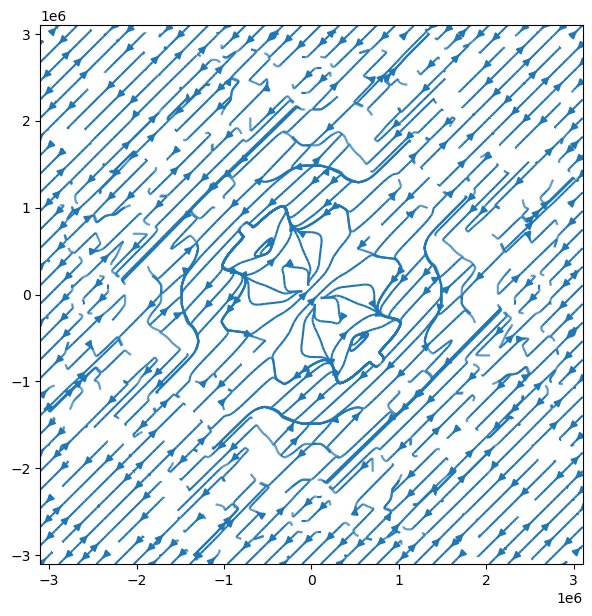

In [300]:
 
# Field Lines
fig = plt.figure(figsize = (7, 7))
strm=plt.streamplot(px, pz, Bx, Bz,broken_streamlines=False )#color=U, linewidth=2, cmap='autumn')
#fig.colorbar(strm.lines)
#strm = axs[1].streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
#fig.colorbar(strm.lines)
plt.show()